In [54]:
import PIL #library pour afficher des images à partir d'url
import wikipedia
import requests  
import re
from bs4 import BeautifulSoup
# Import libraries
import pywikibot
import pandas as pd
import mwparserfromhell
import numpy as np
from scipy.spatial import distance
from nltk.tokenize import word_tokenize
import pandas as pd

from tqdm import tqdm
tqdm.pandas()
import time

import string as str
import matplotlib.pyplot as plt

In [56]:
#Define every dataframe for Climate change we'll need
df = pd.read_csv('climatechange.csv')
df_title = df[df['Name only'].str.contains('climate change', case = False)]
df_title_regional = df_title[df_title['Name only'].str.contains('climate change in', case = False)]
df_title_non_regional = df_title[df_title['Name only'].str.contains('climate change in', case = False) == False]
df_sections = df[df['Name only'].str.contains('climate change', case = False) == False]

In [3]:
#Medieval cuisine dataframe
dm = pd.read_csv('medievalcuisine.csv')
#CRISPR dataframe
dc = pd.read_csv('CRISPR.csv')

## Growth of the corpus over time

In [8]:
d_growth = df.groupby('Year').count().cumsum()[['Name only']]
d_growth.rename({'Name only' : 'Entire corpus'}, axis = 1, inplace = True)

,Entire corpus
Year,
2001,65
2002,130
2003,181
2004,230
2005,309
2006,364
2007,432
2008,504
2009,547


In [9]:
d_growth['Title corpus'] = df_title.groupby('Year').count().cumsum()['Name only']
d_growth['Section corpus'] = df_sections.groupby('Year').count().cumsum()['Name only']
d_growth['Regional subcorpus'] = df_title_regional.groupby('Year').count().cumsum()['Name only']
d_growth['Non-regional subcorpus'] = df_title_non_regional.groupby('Year').count().cumsum()['Name only']

Text(0.5, 1.0, 'Year of birth of the articles, according to the location of the key words')

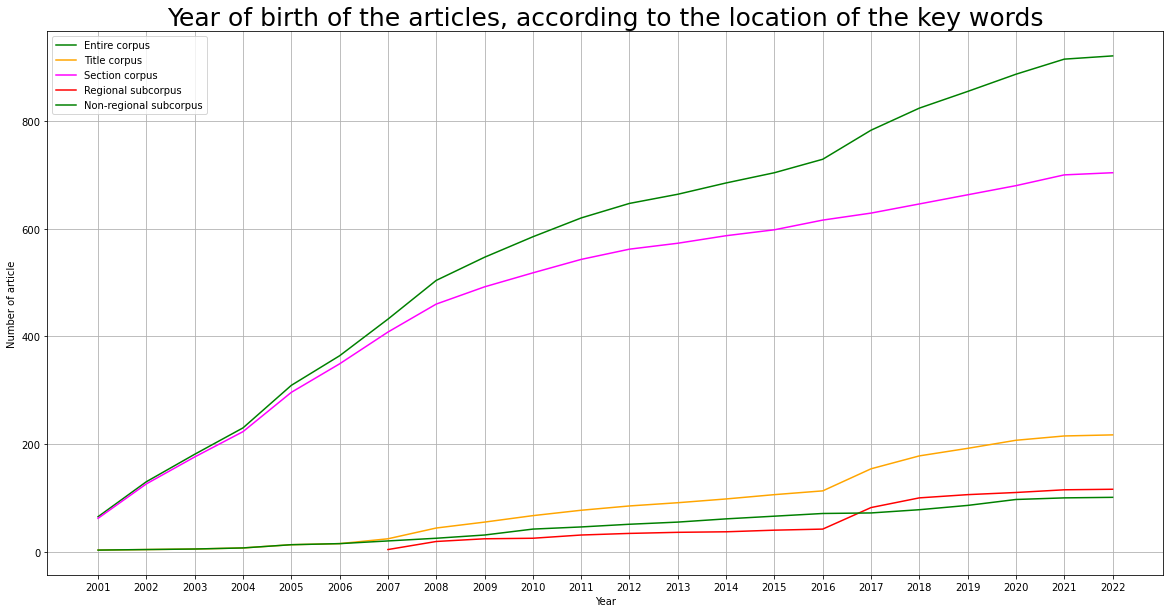

In [12]:
d_growth.plot.line(figsize = (20, 10), legend = True, ylabel = 'Number of article', color = ['g', 'orange', 'magenta', 'r'], xticks = d_growth.index, grid = True)
plt.title(label = 'Year of birth of the articles, according to the location of the key words', fontsize = 25)

## Edit protection

In [14]:
d_protect = df.groupby('Edit protection').count()[['Name only']]
d_protect.loc['Require autoconfirmed or confirmed access (no expiry set)'] += 2
d_protect.drop('Require autoconfirmed or confirmed access (14:00, 3 December 2022)', axis = 0, inplace = True)
d_protect.drop('Require autoconfirmed or confirmed access (18:44, 30 December 2023)', axis = 0, inplace = True)

<AxesSubplot:>

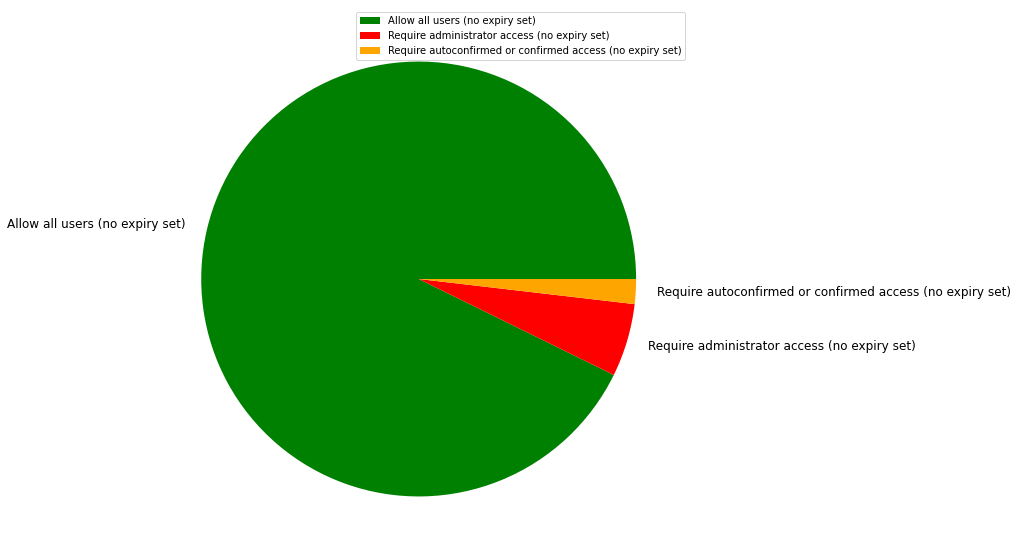

In [17]:
d_protect.plot.pie(y = 'Name only', figsize = (10, 10), colors = ['g', 'r', 'orange'], ylabel = '', fontsize = 12)

## Comparison of sources ratio between Climate change corpuses

In [18]:
d_ratio = pd.DataFrame(index = ['Entire corpus', 'Title corpus', 'Regional subcorpus', 'Non-regional subcorpus', 'Section corpus'])
d_ratio['sci'] = [df['Sci count'].median(), df_title['Sci count'].median(), df_title_regional['Sci count'].median(), df_title_non_regional['Sci count'].median(), df_sections['Sci count'].median()]
d_ratio['gov'] = [df['gov count'].median(), df_title['gov count'].median(), df_title_regional['gov count'].median(), df_title_non_regional['gov count'].median(), df_sections['gov count'].median()]
d_ratio['org'] = [df['org count'].median(), df_title['org count'].median(), df_title_regional['org count'].median(), df_title_non_regional['org count'].median(), df_sections['org count'].median()]
d_ratio['com'] = [df['com count'].median(), df_title['com count'].median(), df_title_regional['com count'].median(), df_title_non_regional['com count'].median(), df_sections['com count'].median()]
d_ratio['IPCC'] = [df['IPCC count'].median(), df_title['IPCC count'].median(), df_title_regional['IPCC count'].median(), df_title_non_regional['IPCC count'].median(), df_sections['IPCC count'].median()]
d_ratio

,sci,gov,org,com,IPCC
Entire corpus,0.125000,0.044544,0.131760,0.166667,0.000000
Title corpus,0.145078,0.058824,0.164265,0.148936,0.000000
Regional subcorpus,0.142857,0.125000,0.160645,0.207143,0.000000
Non-regional subcorpus,0.171429,0.032609,0.165644,0.112500,0.005464
Section corpus,0.119403,0.041667,0.125000,0.166667,0.000000


Text(0.5, 1.0, 'Type of sources ratio of the different parts of the corpus')

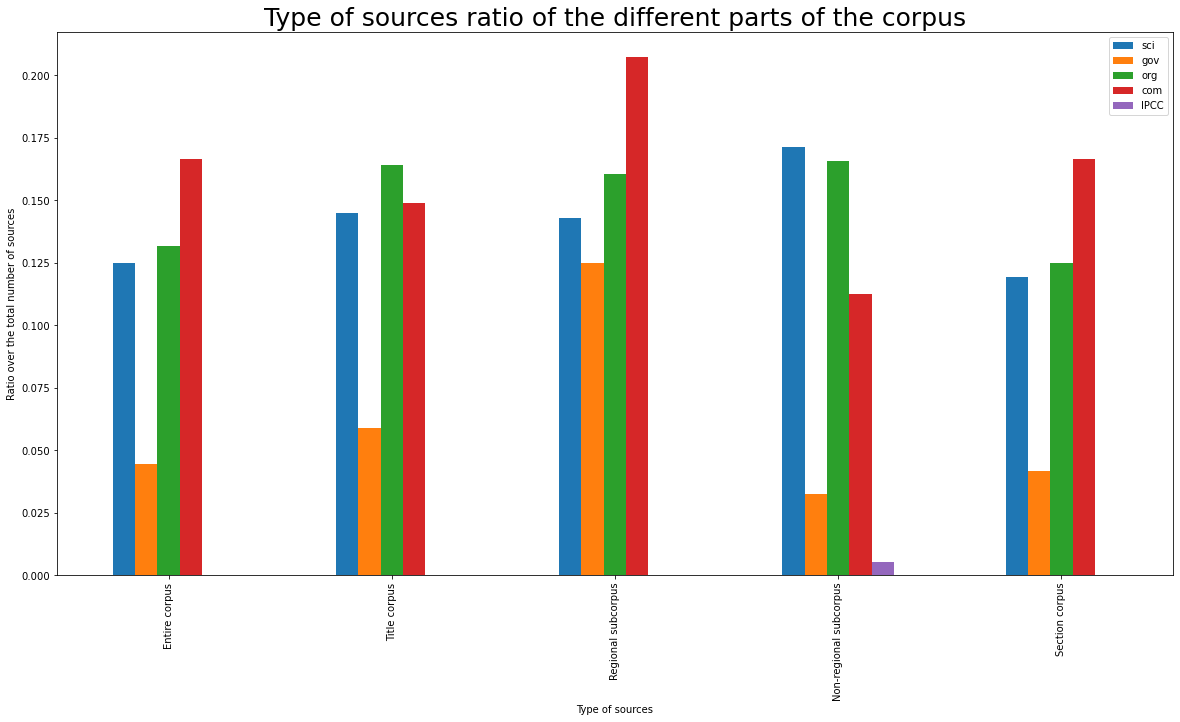

In [21]:
d_ratio.plot.bar(figsize = (20, 10), xlabel = 'Type of sources', ylabel = 'Ratio over the total number of sources')
plt.title(label = 'Type of sources ratio of the different parts of the corpus', fontsize = 25)

## Comparing sources ratio between corpuses (medieval cuisine + CRISPR)

### To have the tot sci score (+= IPCC) and the tot com score (+= The Guardian), run these cells

In [26]:
dc['tot com count'] = (dc['citationguardian'] + dc['citation com'])/dc['Ref count']
dc['tot sci count'] = (dc['nb_journal_citations'] + dc['citation IPCC'])/dc['Ref count']
df['tot com count'] = (df['citationguardian'] + df['citation com'])/df['Ref count']
df['tot sci count'] = (df['nb_journal_citations'] + df['citation IPCC'])/df['Ref count']
dm['tot com count'] = (dm['citationguardian'] + dm['citation com'])/dm['Ref count']
dm['tot sci count'] = (dm['nb_journal_citations'] + dm['citation IPCC'])/dm['Ref count']

d_ratio_corpus_tot = pd.DataFrame(index = ['CRISPR', 'Effects of climate change', 'Medieval cuisine'])
d_ratio_corpus_tot['sci'] = [dc['tot sci count'].median(), df['tot sci count'].median(), dm['tot sci count'].median()]
d_ratio_corpus_tot['gov'] = [dc['gov count'].median(), df['gov count'].median(), dm['gov count'].median()]
d_ratio_corpus_tot['org'] = [dc['org count'].median(), df['org count'].median(), dm['org count'].median()]
d_ratio_corpus_tot['com'] = [dc['tot com count'].median(), df['tot com count'].median(), dm['tot com count'].median()]
d_ratio_corpus_tot

,sci,gov,org,com
CRISPR,0.812169,0.000000,0.036129,0.051587
Effects of climate change,0.142857,0.044544,0.131760,0.179762
Medieval cuisine,0.010309,0.013889,0.090909,0.312139


<AxesSubplot:>

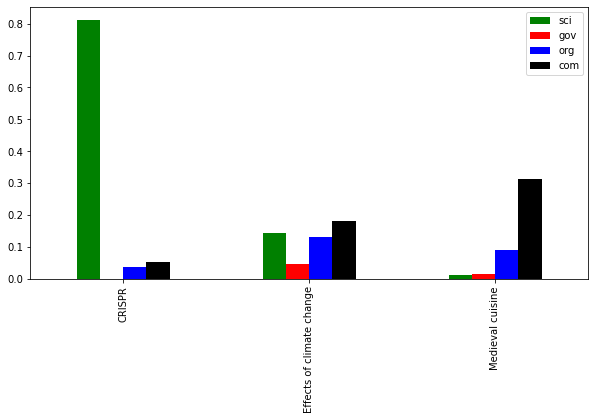

In [28]:
d_ratio_corpus_tot.plot.bar(figsize = (10, 5), color = ['g', 'r', 'b', 'k'])

### To have only the sci score and the com score without adding stuff, run these cells

In [23]:
d_ratio_corpus = pd.DataFrame(index = ['CRISPR', 'Effects of climate change', 'Medieval cuisine'])
d_ratio_corpus['sci'] = [dc['Sci count'].median(), df['Sci count'].median(), dm['Sci count'].median()]
d_ratio_corpus['gov'] = [dc['gov count'].median(), df['gov count'].median(), dm['gov count'].median()]
d_ratio_corpus['org'] = [dc['org count'].median(), df['org count'].median(), dm['org count'].median()]
d_ratio_corpus['com'] = [dc['com count'].median(), df['com count'].median(), dm['com count'].median()]
d_ratio_corpus

,sci,gov,org,com
CRISPR,0.812169,0.000000,0.036129,0.051587
Effects of climate change,0.125000,0.044544,0.131760,0.166667
Medieval cuisine,0.010309,0.013889,0.090909,0.300469


<AxesSubplot:>

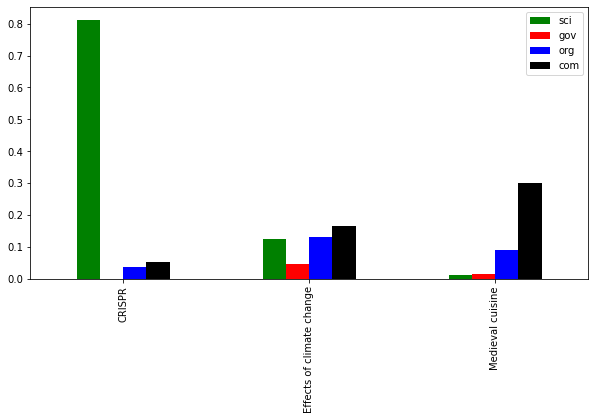

In [29]:
d_ratio_corpus.plot.bar(figsize = (10, 5), color = ['g', 'r', 'b', 'k'])

## Get the protection status

In [65]:
def protection_status(data):
    
    years_off = []
    for i in range(22):
        years_off.append(2001+i)
    
    wrong_ones = []
    dot = pd.DataFrame(years_off)
    
    for article in data:

        html_text = requests.get(('https://en.wikipedia.org/wiki/Special:Log?type=protect&user=&page={}&wpdate=&tagfilter=&subtype=').format('Effects_of_climate_change')).text
        soup = BeautifulSoup(html_text, 'lxml')
        dic = {}
        results = soup.find_all('li', {'class' : 'mw-logline-protect'})
        
        for i in results:
            z = i.find('a')
            protection = i.get('data-mw-logaction')
            date = repr(z)[repr(z).find('Log">') + 5:repr(z).find('</a>')]
            dic[pd.to_datetime(date, format = '%H:%M, %d %B %Y')] = protection
        
        if 'expires' in repr(results):
            res = repr(results).split('span')
            for string in res:
                if '] (expires' in string:
                    date_get = string[string.find('] (expires ') + 11:string.find(' (UTC))')]
                    if ') [' in date_get:
                        date_get = date_get[:date_get.find(') [')]
                    if '] (' in date_get:
                        date_get = date_get[date_get.find(', '):]
                    if ')' in date_get:
                        date_get = date_get.replace(')', '')
                    if date_get[:2] == ', ':
                        date_get = date_get[2:]
                    if date_get[-1] == ' ':
                        date_get = date_get[:-1]
                    if ',' in date_get:
                        date_get = date_get.replace(',', '')
                    try:
                        dic[pd.to_datetime(date_get, format = '%H:%M %d %B %Y')] = 'protect/unprotect'
                    except:
                        try:
                            dic[pd.to_datetime(date_get, format = '%H:%M %B %d %Y')] = 'protect/unprotect'
                        except:
                            wrong_ones.append(article)

        if len(dic) != 0:
            dic = dict(sorted(dic.items()))
            new_dic = {}
            s = set()
            list_date = list(dic.keys())[::-1]
            for date in list_date:
                s.add(date.year)
            for j in sorted(s):
                deadline = pd.to_datetime('30 June {} 00:00:00'.format(j))
                same_year = []
                for date in list_date:
                    if date.year == deadline.year and date <= deadline:
                        same_year.append(date)
                        if len(same_year) != 0:
                            new_dic[deadline.year] = dic[max(same_year)]
                    else :
                        if date.year == deadline.year and date > pd.to_datetime('30 June {}'.format(max(s))):
                            new_dic[max(s) + 1] = dic[max(list_date)]

            keys = list(new_dic.keys())
            for year in years_off:
                if year < min(keys):
                    new_dic[year] = 'protect/unprotect'
                elif year > max(keys):
                    new_dic[year] = new_dic[max(keys)]
                else:
                    for low in keys:
                        for high in keys:
                            if year > low and year < high and len(keys[keys.index(low):keys.index(high)]) == 1:
                                new_dic[year] = new_dic[low]
                                
            d = dict(sorted(new_dic.items()))
            
            if len(d) == 22:
                dot[article] = d.values()
            else:
                dot[article] = list(d.values())[:22]
        
    return dot

In [ ]:
data_scrap = protection_status(list(df['Name only']))

C:\Users\ljouv\AppData\Local\Temp/ipykernel_2228/676558630.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dot[article] = d.values()


In [ ]:
data_protec = pd.DataFrame(d_growth.index)
for title in data_scrap.columns[1:]:
    l = []
    d = data_scrap.set_index(0)[title]
    for status in d:
        if 'unprotect' in status:
            l.append(0)
        else:
            l.append(1)
    data_protec[title] = l

In [ ]:
data_protect

In [ ]:
zd = pd.DataFrame(d_growth['Entire corpus'], columns = ['Total number of articles'])
zd['Number of protected articles'] = data_protec.set_index(0).sum(axis = 1)
zd